In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cvxpy as cp

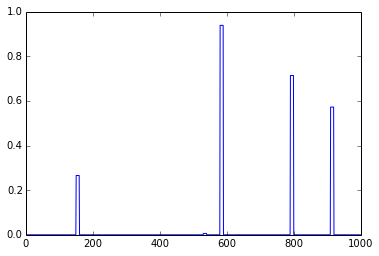

In [23]:
np.random.seed(0)

m = 100
ni = 10
k = 100

rho = 0.05
sigma = 0.05

A = np.random.randn(m, ni*k)
x0 = np.zeros(ni*k)
for i in range(k):
    if np.random.rand() < rho:
        x0[i*ni:(i+1)*ni] = np.random.rand()
b = A.dot(x0) + sigma*np.random.randn(m)
plt.plot(x0)

In [31]:
lam = cp.Parameter(value=1, sign='positive')
x = cp.Variable(ni*k)
f = cp.sum_squares(A*x - b) + lam*cp.norm1(x) + lam*cp.tv(x)
prob = cp.Problem(cp.Minimize(f))

1.314130442439233

In [41]:
lambdas = np.logspace(3, -3)
err = np.empty(len(lambdas))
for i, lam_value in enumerate(lambdas):
    lam.value = lam_value
    prob.solve()
    err[i] = np.sum(np.square(np.asarray(x.value).ravel() - x0))
    print lam_value, np.sum(np.abs(x.value) > 1e-4), err[i]

1000.0 0 17.8817236022
868.511373751 0 17.8817235819
754.312006335 0 17.8817235936
655.12855686 0 17.8817236034
568.986602902 0 17.8817236156
494.171336132 0 17.8817236184
429.193426013 0 17.8817236022
372.759372031 0 17.8817236039
323.745754282 0 17.8817236058
281.176869797 0 17.8817236064
244.205309455 0 17.8817236046
212.095088792 0 17.8817236007
184.206996933 0 17.8817235946
159.985871961 3 17.7533667118
138.949549437 20 15.3584945421
120.679264064 20 12.4126897992
104.811313415 30 9.76948831878
91.0298177992 30 7.54594444053
79.0604321091 30 5.86939035537
68.6648845004 30 4.6061366614
59.6362331659 30 3.65370455285
51.7947467923 34 2.9058715476
44.9843266897 37 2.27380427279
39.0693993705 37 1.79141024238
33.932217719 39 1.39426858742
29.4705170255 39 1.0859071878
25.595479227 39 0.851434046177
22.2299648253 39 0.672864011832
19.3069772888 39 0.536687802479
16.7683293681 40 0.423929229226
14.563484775 40 0.32059624081
12.6485521686 40 0.242572430687
10.9854114199 40 0.18363719571


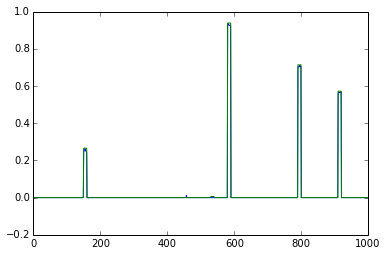

In [45]:
lam.value = sigma*np.sqrt(m*np.log(ni*k))
prob.solve()
plt.plot(np.asarray(x.value))
plt.plot(x0)

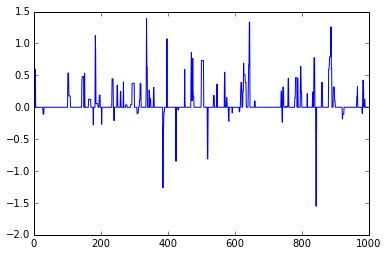

In [15]:
plt.plot(np.asarray(x.value))